In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [37]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
#The preprocessing module provides the StandardScaler utility class, 
#which is a quick and easy way to perform the following operation on an array-like datase

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')


    Refer Telecom Churn Dataset. 
    Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a suitable regression algorithm to find whether the customer will churn or not(Y/N).

In [38]:
df = pd.read_csv('Telcom-Customer-Churn.csv',header=0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
df = df.dropna()
print(list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [42]:
df.shape

(7043, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Target:

Churn — Whether the customer churned or not (Yes, No)

Numeric Features:

    Tenure — Number of months the customer has been with the company
    MonthlyCharges — The monthly amount charged to the customer
    TotalCharges — The total amount charged to the customer

Categorical Features:

    CustomerID
    Gender — M/F
    SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
    Partner — Whether customer has a partner or not (Yes, No)
    Dependents — Whether customer has dependents or not (Yes, No)
    PhoneService — Whether the customer has a phone service or not (Yes, No)
    MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
    InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
    OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
    OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
    DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
    TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
    StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
    StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
    Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
    PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [44]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [45]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [46]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#Total Charges will be related to Monthly Charges.

#We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [47]:
value = (df['TotalCharges']/df['MonthlyCharges']).median()*df['MonthlyCharges']
value

0        860.629872
1       1641.972236
2       1552.593589
3       1219.586050
4       2038.409782
           ...     
7038    2444.938465
7039    2975.443981
7040     853.421917
7041    2145.087521
7042    3046.081944
Name: MonthlyCharges, Length: 7043, dtype: float64

In [48]:
df['TotalCharges'] = value.where(df['TotalCharges'] == np.nan, other =df['TotalCharges'])

In [49]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

#     Exploratory Data Analytics
variate Analysis

n (Target Variable)

In [50]:
df.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

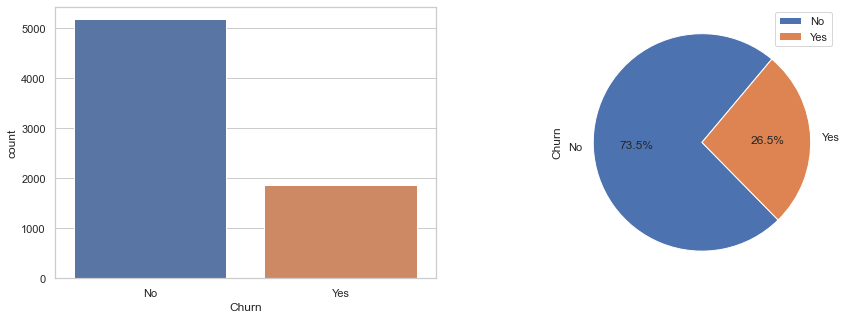

In [51]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(df['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(df['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
plt.gca().set_aspect('equal')

plt.show()

In [52]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### We have a data with 27% churn rate. 27 % of customers switched to another firm.

# Tenure
The time for which a customer has been using the service.

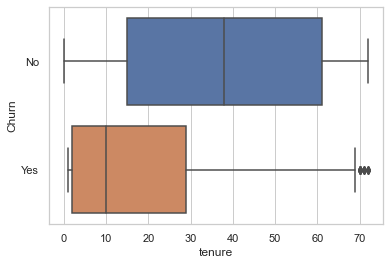

In [53]:
sns.boxplot(x = 'tenure', y = 'Churn', data = df)
plt.show()

#### Customer with more tenure tends to churn less.

# Phone Service
Whether a customer has a landline phone service along with the internet service.

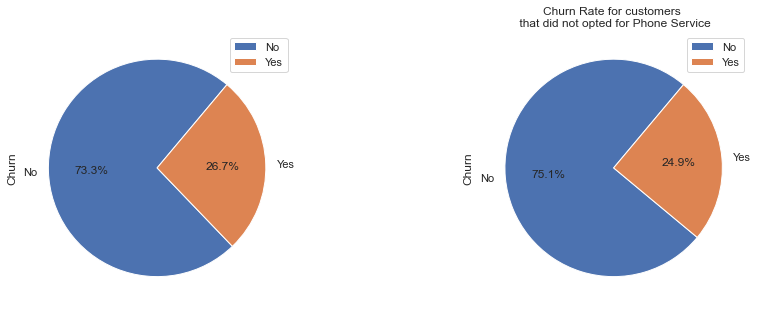

In [54]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

pie_PhoneService_Yes = pd.DataFrame(df[df['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%',startangle= 50, ax = axs[0])
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(df[df['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50,ax = axs[1])
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

#### Opting for phone service does not have a significant impact on churn rate.

# Contract

In [55]:
df.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.208258,18.036645,66.398490,1369.254581
One year,0.128988,42.044807,65.048608,3034.683084
Two year,0.085546,56.735103,60.770413,3728.933947


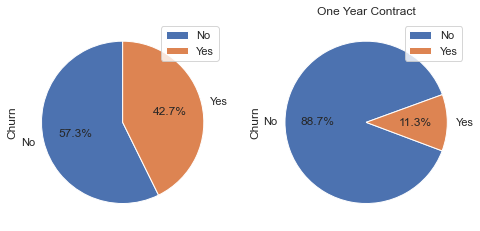

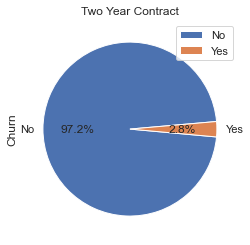

In [56]:

fig, axs = plt.subplots(1,2, figsize = (8,5))


pie_Contract_m2m = pd.DataFrame(df[df['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 90 ,ax=axs[0])
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(df[df['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20,ax=axs[1])
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(df[df['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

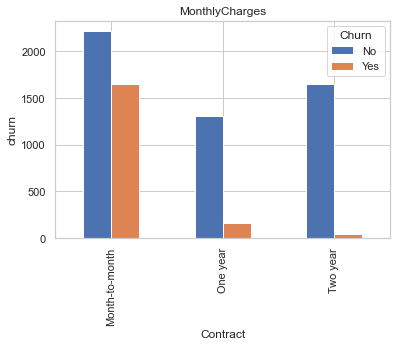

In [57]:
%matplotlib inline
pd.crosstab(df.Contract,df.Churn).plot(kind='bar')
plt.title('MonthlyCharges')
plt.xlabel('Contract')
plt.ylabel('churn')
plt.savefig('Contract')

#### Customers with One Year and Two year contract change their firm lesser than month to month churn

# Paperless Billing

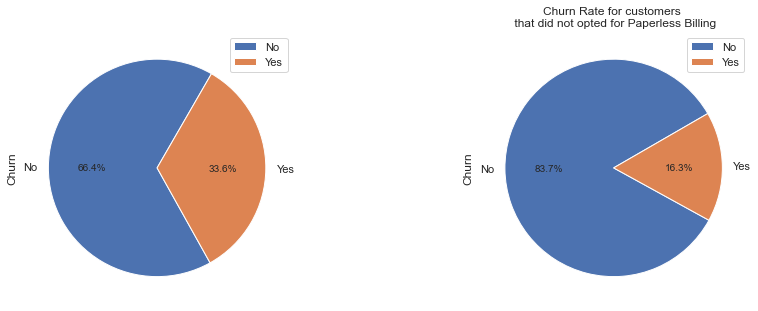

In [58]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(df[df['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60,ax=axs[0])
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(df[df['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30,ax=axs[1])
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

#### Churn Rate is higher for the customers who choose for paperless billing than the Churn Rate for customers that did not opted for Paperless Billin

# Payment Method

In [59]:
df.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [60]:
df.groupby('PaymentMethod').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3079.299546
Credit card (automatic),0.145204,43.269382,66.512385,3071.396022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058313,21.830025,43.917060,1054.483915


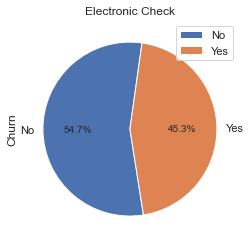

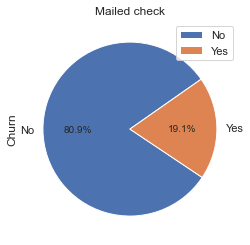

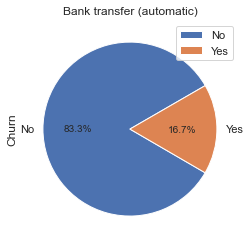

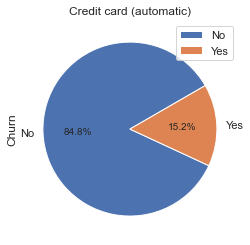

In [61]:


pie_PaymentMethod_ec = pd.DataFrame(df[df['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(df[df['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(df[df['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(df[df['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

#### customers with Electronic Check tends to churn more than other payment methods

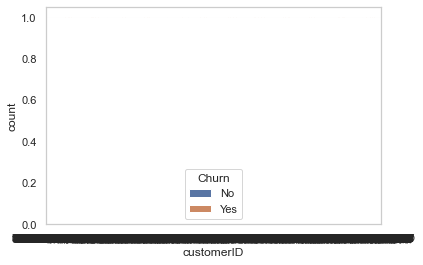

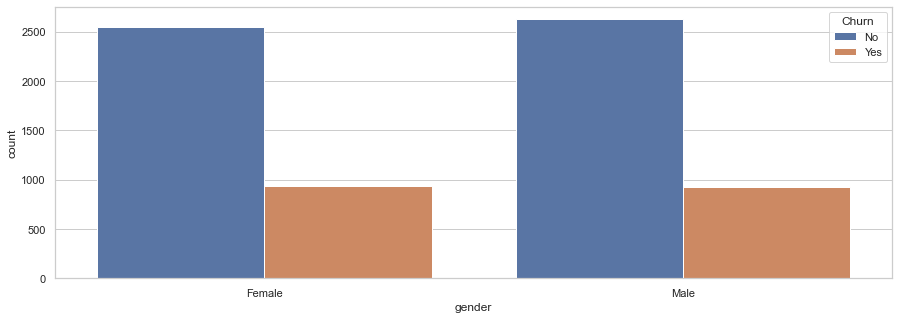

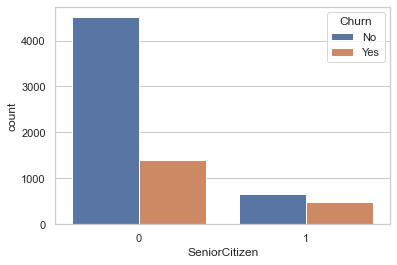

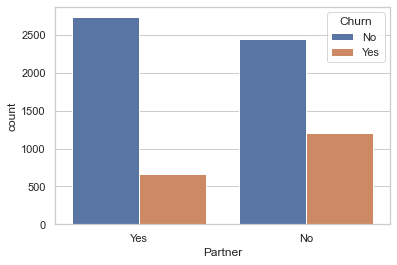

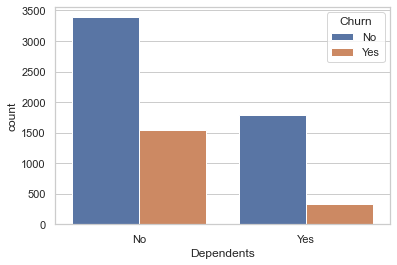

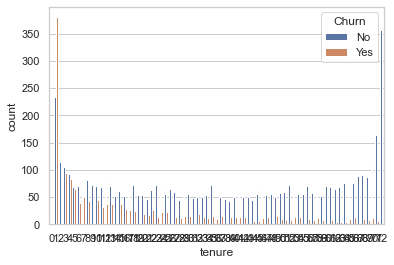

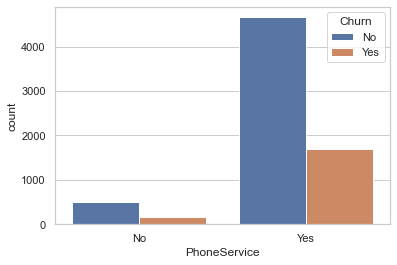

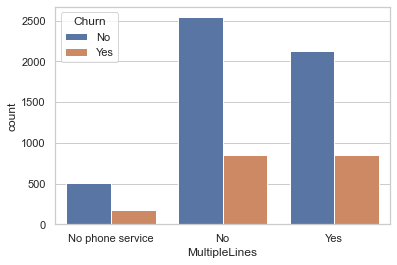

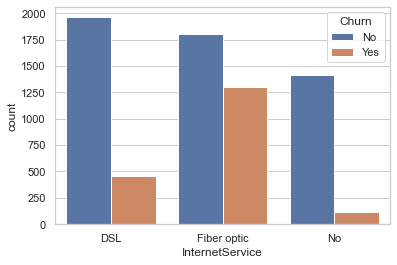

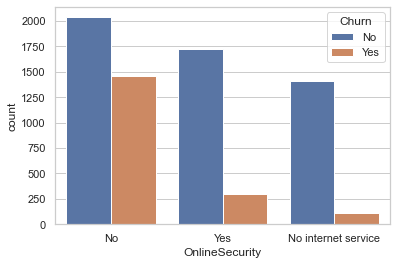

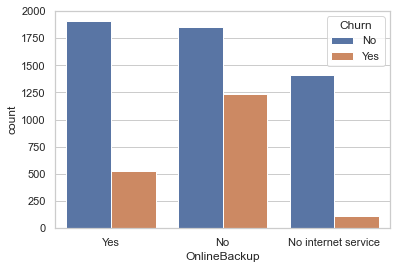

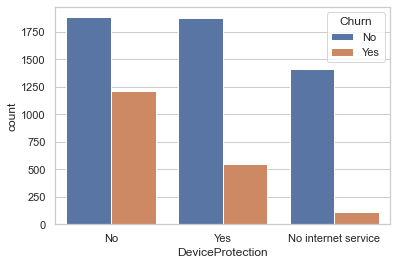

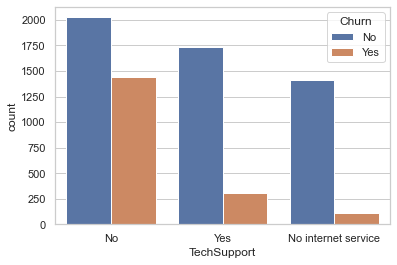

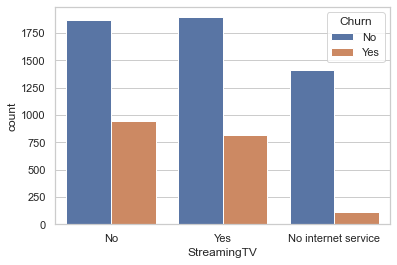

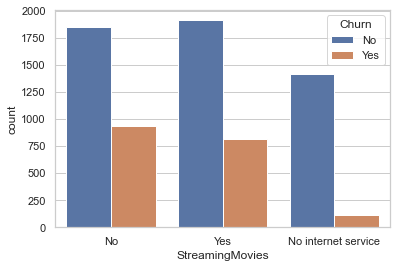

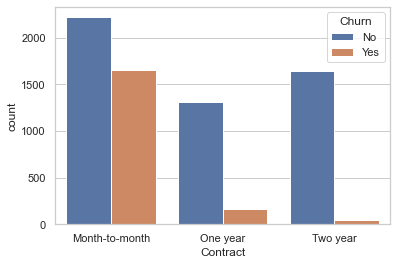

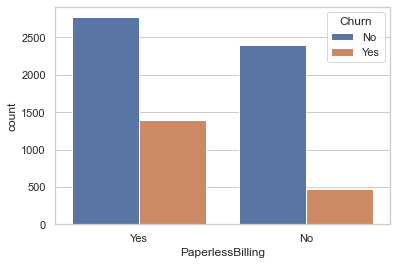

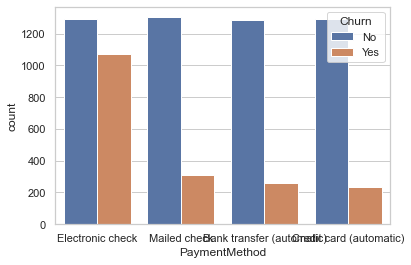

In [62]:
fig = plt.subplots(figsize = (15,5))
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

    #Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

    #Customers with no dependents tends to churn more.

    #Multiple lines of internet connectivity doesn't effect churn that much.

    #Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

    #Customers opted for Online Security churn less than who have not opted.

    #Customers opted for Online Backup churn less than who have not opted.

    #Customers opted for Device Potection churn less than who have not opted.

    #Customers opted for Tech Support churn less than who have not opted.

    #Streaming TV doesn't make such impact on churning.

    #Streaming Movies doesn't make such impact on churning.

    Electronic check mediums are the highest churners
    Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers.
    No Online security, No Tech Support category are high churners
    Non-senior Citizens are high churners

# Model Building
Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [63]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [64]:
# df['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)
# df.head()

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)


In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [68]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


In [73]:
# We have created dummies for the below variables, so we can drop them
telecom = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [75]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Checking for Outliers

In [76]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [77]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [78]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

`It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [79]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [80]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [81]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [82]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [83]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [88]:
#Step 4: Test-Train Split
from sklearn.model_selection import train_test_split

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 5: Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
#StandardScaler. Standardize features by removing the mean and scaling to unit variance. 

In [91]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [92]:
# Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

Step 6: Looking at Correlations

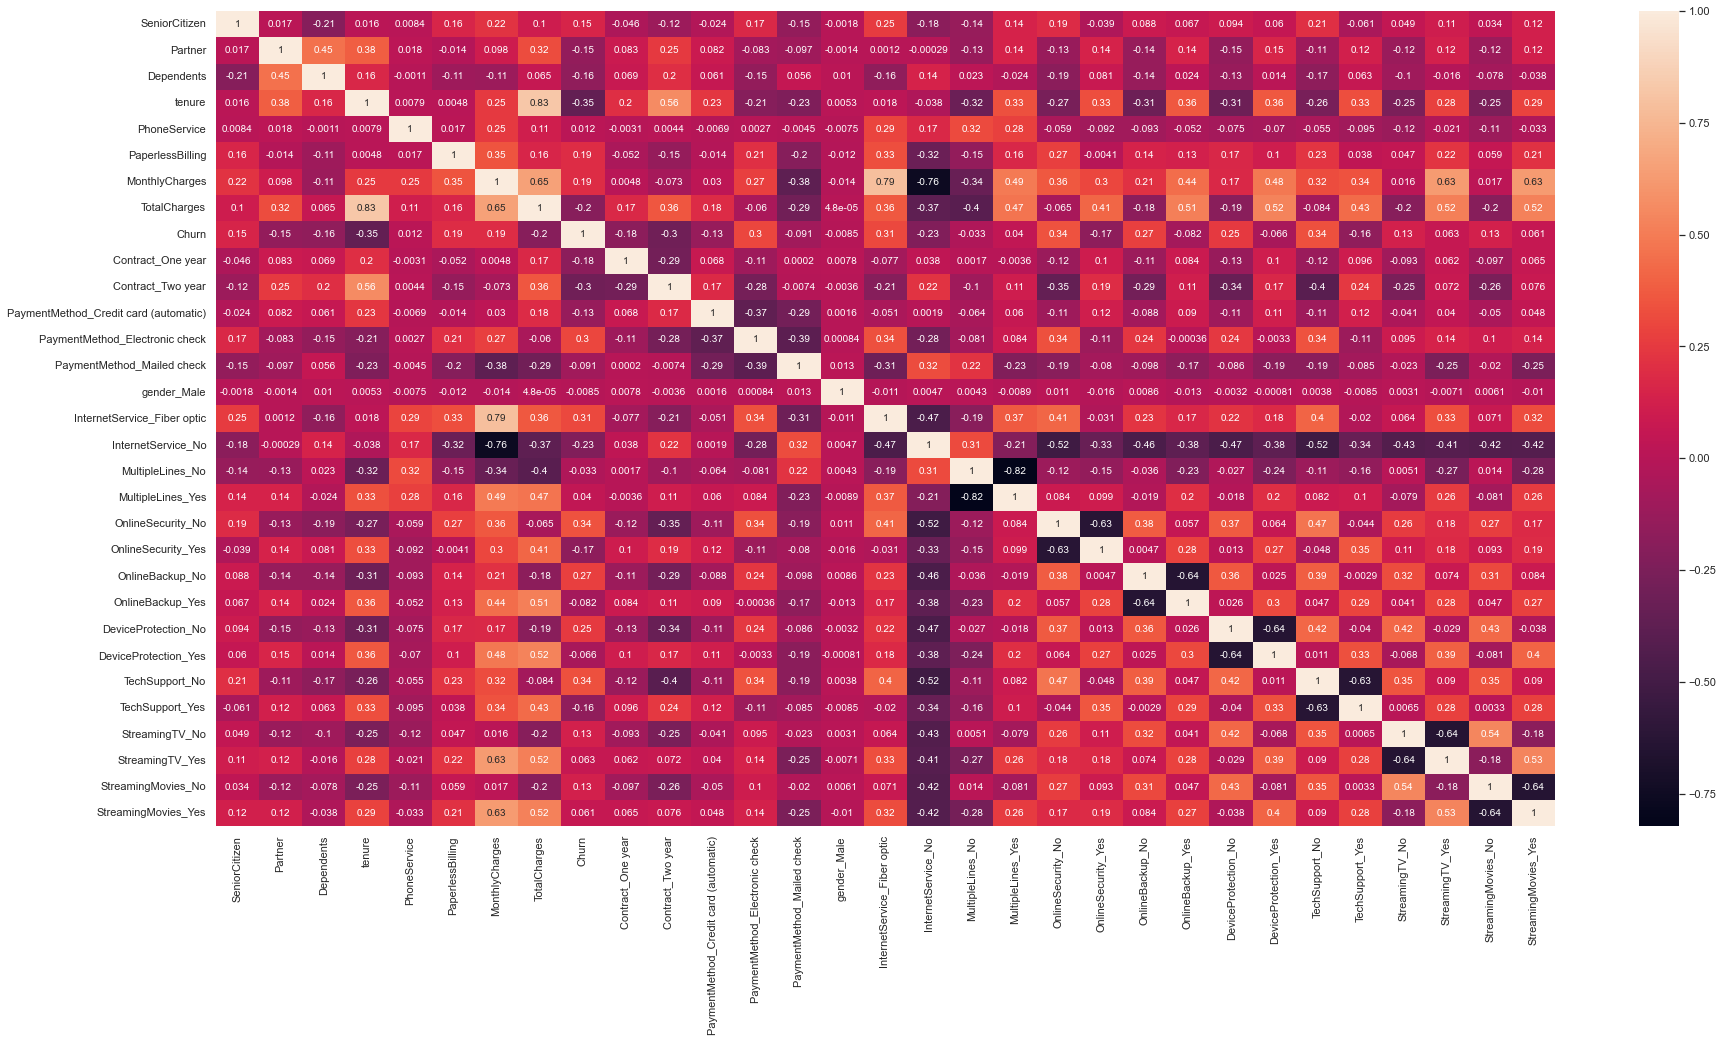

In [93]:
 # Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True
           )
plt.show()

In [94]:
import statsmodels.api as sm

In [95]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 28 Mar 2023   Deviance:                       4009.4
Time:                        14:08:20   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2808      1.188     -2.763      0.006      -5.608      -0.953
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4366      1.325     -2.594      0.009      -6.033      -0.840
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
OnlineSecurity_No                         0.0902      0.058      1.552      0.121      -0.024       0.204
OnlineSecurity_Yes                        0.0657      0.174      0.378      0.706      -0.275       0.406
OnlineBackup_No                          -0.0091      0.055     -0.167      0.868      -0.116       0.098
OnlineBackup_Yes                          0.1650      0.172      0.958      0.338      -0.172       0.502
DeviceProtection_No                      -0.0835      0.056     -1.492      0.136      -0.193       0.026
DeviceProtection_Yes                      0.2394      0.174      1.377      0.168      -0.101       0.580
TechSupport_No                            0.0932      0.058      1.598      0.110      -0.021       0.207
TechSuppo

# Feature Selection Using RFE

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [97]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)            # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 12),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 8),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 5),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 14),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No', False, 2),
 ('MultipleLines_Yes', False, 9),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 13),
 ('OnlineBackup_No', False, 7),
 ('OnlineBackup_Yes', False, 10),
 ('DeviceProtection_No', False, 4),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 11),
 ('StreamingTV_No', False, 15),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 16),
 ('StreamingMovies_Yes', Tr

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'TechSupport_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService',
       'PaymentMethod_Electronic check', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingMovies_No'],
      dtype='object')

Assessing the model with StatsModels

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.3
Date:                Tue, 28 Mar 2023   Deviance:                       4026.5
Time:                        14:08:47   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2819
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3646      0.168    -14.050      0.000      -2.694      -2.035
SeniorCitizen                             0.4456      0.099      4.494      0.000       0.251       0.640
tenure                                   -1.5098      0.187     -8.068      0.000      -1.877      -1.143
PaperlessBilling                          0.3449      0.090      3.844      0.000       0.169       0.521
MonthlyCharges                           -0.5121      0.190     -2.696      0.007      -0.884      -0.140
TotalCharges                              0.7585      0.197      3.848      0.000       0.372       1.145
Contract_One year                        -0.7081      0.128     -5.546      0.000      -0.958      -0.458
Contract_Two year                        -1.2880      0.211     -6.100      0.000      -1.702      -0.874
PaymentMethod_Credit card (automatic)    -0.3687      0.113     -3.275      0.001      -0.589      -0.148
PaymentMethod_Mailed check               -0.3797      0.111     -3.412      0.001      -0.598      -0.162
InternetService_Fiber optic               1.1620      0.219      5.316      0.000       0.734       1.590
InternetService_No                       -0.7897      0.272     -2.904      0.004      -1.323      -0.257
OnlineSecurity_No                         0.3191      0.107      2.995      0.003       0.110       0.528
TechSupport_No                            0.3251      0.108      3.023      0.003       0.114       0.536
StreamingTV_Yes                           0.4228      0.113      3.739      0.000       0.201       0.644
StreamingMovies_Yes                       0.3187      0.111      2.877      0.004       0.102       0.536
=========================================================================================================
"""

In [103]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.191284
5790    0.280380
6498    0.666370
880     0.520629
2784    0.681216
3874    0.450541
5387    0.393916
6623    0.774713
4465    0.221993
5364    0.489497
dtype: float64

In [104]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1912838 , 0.28038034, 0.66637047, 0.52062929, 0.68121626,
       0.45054071, 0.39391607, 0.77471277, 0.22199266, 0.48949717])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.191284,879
1,0,0.280380,5790
2,1,0.666370,6498
3,1,0.520629,880
4,1,0.681216,2784


In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.191284,879,0
1,0,0.280380,5790,0
2,1,0.666370,6498,1
3,1,0.520629,880,1
4,1,0.681216,2784,1


In [107]:
from sklearn import metrics

In [108]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3268  367]
 [ 584  703]]


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8067858594067452


In [127]:
print('true positive:',  confusion[1,1]) # true positive 
print('\ntrue negative:', confusion[0,0])# true negatives
print('\nfalse positive:',  confusion[0,1]) # false positives
print('\nfalse negative:',  confusion[1,0])# false negatives
print('\n confusion matrics:\n', confusion)

true positive: 703

true negative: 3268

false positive: 367

false negative: 584

 confusion matrics:
 [[3268  367]
 [ 584  703]]


In [114]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [118]:
print('Accuracy:', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted ))
print ('F1 score:', f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted ))
print ('Recall:', recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted ))
print ('Precision:', precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted ))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted ))

Accuracy: 0.8067858594067452
F1 score: 0.5965210012728044
Recall: 0.5462315462315462
Precision: 0.6570093457943925

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3635
           1       0.66      0.55      0.60      1287

    accuracy                           0.81      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922


 confussion matrix:
 [[3268  367]
 [ 584  703]]


# Test

In [130]:
X_test_sm = sm.add_constant(X_test[col])
logm2 = sm.GLM(y_test,X_test_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2110
Model:                            GLM   Df Residuals:                     2094
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -906.99
Date:                Tue, 28 Mar 2023   Deviance:                       1814.0
Time:                        14:23:52   Pearson chi2:                 2.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2726
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1836      0.531      0.345      0.730      -0.858       1.225
SeniorCitizen                            -0.1252      0.150     -0.834      0.404      -0.419       0.169
tenure                                   -0.0589      0.011     -5.542      0.000      -0.080      -0.038
PaperlessBilling                          0.4169      0.133      3.131      0.002       0.156       0.678
MonthlyCharges                           -0.0260      0.009     -2.819      0.005      -0.044      -0.008
TotalCharges                              0.0004      0.000      2.995      0.003       0.000       0.001
Contract_One year                        -0.7344      0.196     -3.753      0.000      -1.118      -0.351
Contract_Two year                        -1.6972      0.319     -5.323      0.000      -2.322      -1.072
PaymentMethod_Credit card (automatic)    -0.1791      0.167     -1.075      0.283      -0.506       0.148
PaymentMethod_Mailed check               -0.0610      0.168     -0.364      0.716      -0.390       0.268
InternetService_Fiber optic               1.4919      0.330      4.517      0.000       0.845       2.139
InternetService_No                       -0.5717      0.386     -1.481      0.139      -1.329       0.185
OnlineSecurity_No                         0.3947      0.158      2.498      0.012       0.085       0.704
TechSupport_No                            0.2842      0.164      1.735      0.083      -0.037       0.605
StreamingTV_Yes                           0.3535      0.172      2.057      0.040       0.017       0.690
StreamingMovies_Yes                       0.6904      0.173      3.981      0.000       0.350       1.030
=========================================================================================================
"""

In [131]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

942     0.626369
3730    0.426682
1761    0.004727
2283    0.693415
1872    0.008836
1970    0.692478
2532    0.285151
1616    0.007021
2485    0.560285
5914    0.096974
dtype: float64

In [133]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.626369
3730,0.426682
1761,0.004727
2283,0.693415
1872,0.008836


In [142]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
942,0,0.626369,942
3730,1,0.426682,3730
1761,0,0.004727,1761
2283,1,0.693415,2283
1872,0,0.008836,1872


In [144]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
942,0,0.626369,942,1
3730,1,0.426682,3730,0
1761,0,0.004727,1761,0
2283,1,0.693415,2283,1
1872,0,0.008836,1872,0


In [148]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.795260663507109

In [149]:
print('Accuracy:', accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print ('F1 score:', f1_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print ('Recall:', recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print ('Precision:', precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted ))
print ('\n clasification report:\n', classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted))

Accuracy: 0.795260663507109
F1 score: 0.6000000000000001
Recall: 0.5567010309278351
Precision: 0.6506024096385542

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1528
           1       0.65      0.56      0.60       582

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110


 confussion matrix:
 [[1354  174]
 [ 258  324]]
